#  **Data Cleaning**

##  **1. Project Overview**

###  Context

The real estate market in Ames, Iowa, is diverse, with many factors influencing home values. Buyers, sellers, and investors rely on accurate property valuations to make informed decisions. However, raw housing data often contains missing values, inconsistencies, and extreme outliers, making predictions challenging.

The Ames Housing dataset contains information over 2000 house information and over 80 feature columns on different house characteristics from interiors, exteriors, infrastructure and attachments.  

### Objectives

- Handle missing values effectively without introducing bias </br>
-  Standardize feature names for better usability </br>
-  Detect and manage outliers to improve model stability </br>
-  Ensure a structured, well-documented dataset for further analysis </br>

## **2. Import Libraries & Load Data**

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames_df = pd.read_csv('../data/raw_data/ames.csv')

In [3]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## **3. Dataset Dictionary**

| Feature            | Type     | Description | Identifier |
|--------------------|---------|-------------|-------------------|
| Id                | int64   | Unique identifier for each property. | id |
| PID               | int64   | Parcel identification number. | pid |
| MS SubClass       | int64   | Identifies the type of dwelling involved in the sale. | ms_subclass |
| MS Zoning         | object  | General zoning classification of the sale. | ms_zoning |
| Lot Frontage      | float64 | Linear feet of street connected to property. | lot_frontage |
| Lot Area         | int64   | Lot size in square feet. | lot_area |
| Street           | object  | Type of road access to property. | street |
| Alley           | object  | Type of alley access to property. | alley |
| Lot Shape        | object  | General shape of property. | lot_shape |
| Land Contour     | object  | Flatness of the property. | land_contour |
| Utilities        | object  | Type of utilities available. | utilities |
| Lot Config       | object  | Lot configuration. | lot_config |
| Land Slope       | object  | Slope of property. | land_slope |
| Neighborhood     | object  | Physical locations within Ames city limits. | neighborhood |
| Condition 1      | object  | Proximity to various conditions. | condition_1 |
| Condition 2      | object  | Proximity to additional conditions (if applicable). | condition_2 |
| Bldg Type        | object  | Type of dwelling. | bldg_type |
| House Style      | object  | Style of dwelling. | house_style |
| Overall Qual     | int64   | Rates overall material and finish of the house (1-10). | overall_qual |
| Overall Cond     | int64   | Rates overall condition of the house (1-10). | overall_cond |
| Year Built       | int64   | Original construction year. | year_built |
| Year Remod/Add   | int64   | Remodel year (same as construction year if no remodeling). | year_remod_add |
| Roof Style       | object  | Type of roof. | roof_style |
| Roof Matl        | object  | Roof material. | roof_matl |
| Exterior 1st     | object  | Exterior covering on house. | exterior_1st |
| Exterior 2nd     | object  | Exterior covering on house (if multiple materials). | exterior_2nd |
| Mas Vnr Type     | object  | Masonry veneer type. | mas_vnr_type |
| Mas Vnr Area     | float64 | Masonry veneer area in square feet. | mas_vnr_area |
| Exter Qual       | object  | Evaluates the quality of the material on the exterior. | exter_qual |
| Exter Cond       | object  | Evaluates the condition of the material on the exterior. | exter_cond |
| Foundation       | object  | Type of foundation. | foundation |
| Bsmt Qual        | object  | Evaluates the height of the basement. | bsmt_qual |
| Bsmt Cond        | object  | Evaluates the general condition of the basement. | bsmt_cond |
| Bsmt Exposure    | object  | Walkout or garden level basement walls. | bsmt_exposure |
| BsmtFin Type 1   | object  | Rating of basement finished area. | bsmtfin_type_1 |
| BsmtFin SF 1     | float64 | Type 1 finished square feet. | bsmtfin_sf_1 |
| BsmtFin Type 2   | object  | Rating of basement finished area (if multiple types). | bsmtfin_type_2 |
| BsmtFin SF 2     | float64 | Type 2 finished square feet. | bsmtfin_sf_2 |
| Bsmt Unf SF      | float64 | Unfinished square feet of basement area. | bsmt_unf_sf |
| Total Bsmt SF    | float64 | Total square feet of basement area. | total_bsmt_sf |
| Heating          | object  | Type of heating. | heating |
| Heating QC       | object  | Heating quality and condition. | heating_qc |
| Central Air      | object  | Central air conditioning (Y = Yes, N = No). | central_air |
| Electrical       | object  | Electrical system. | electrical |
| 1st Flr SF       | int64   | First floor square feet. | first_flr_sf |
| 2nd Flr SF       | int64   | Second floor square feet. | second_flr_sf |
| Low Qual Fin SF  | int64   | Low quality finished square feet (all floors). | low_qual_fin_sf |
| Gr Liv Area      | int64   | Above grade (ground) living area square feet. | gr_liv_area |
| Bsmt Full Bath   | float64 | Basement full bathrooms. | bsmt_full_bath |
| Bsmt Half Bath   | float64 | Basement half bathrooms. | bsmt_half_bath |
| Full Bath        | int64   | Full bathrooms above grade. | full_bath |
| Half Bath        | int64   | Half bathrooms above grade. | half_bath |
| Bedroom AbvGr    | int64   | Number of bedrooms above basement level. | bedroom_abvgr |
| Kitchen AbvGr    | int64   | Number of kitchens. | kitchen_abvgr |
| Kitchen Qual     | object  | Kitchen quality. | kitchen_qual |
| TotRms AbvGrd    | int64   | Total rooms above grade (excluding bathrooms). | totrms_abvgrd |
| Functional       | object  | Home functionality rating. | functional |
| Fireplaces       | int64   | Number of fireplaces. | fireplaces |
| Fireplace Qu     | object  | Fireplace quality. | fireplace_qu |
| Garage Type      | object  | Garage location. | garage_type |
| Garage Yr Blt    | float64 | Year garage was built. | garage_yr_blt |
| Garage Finish    | object  | Interior finish of the garage. | garage_finish |
| Garage Cars      | float64 | Size of garage in car capacity. | garage_cars |
| Garage Area      | float64 | Size of garage in square feet. | garage_area |
| Garage Qual      | object  | Garage quality. | garage_qual |
| Garage Cond      | object  | Garage condition. | garage_cond |
| Paved Drive      | object  | Paved driveway (Y = Yes, P = Partial, N = No). | paved_drive |
| Wood Deck SF     | int64   | Wood deck area in square feet. | wood_deck_sf |
| Open Porch SF    | int64   | Open porch area in square feet. | open_porch_sf |
| Enclosed Porch   | int64   | Enclosed porch area in square feet. | enclosed_porch |
| 3Ssn Porch       | int64   | Three-season porch area in square feet. | three_ssn_porch |
| Screen Porch     | int64   | Screen porch area in square feet. | screen_porch |
| Pool Area        | int64   | Pool area in square feet. | pool_area |
| Pool QC         | object  | Pool quality. | pool_qc |
| Fence           | object  | Fence quality. | fence |
| Misc Feature     | object  | Miscellaneous feature not covered in other categories. | misc_feature |
| Misc Val        | int64   | Value of miscellaneous feature. | misc_val |
| Mo Sold         | int64   | Month sold (MM). | mo_sold |
| Yr Sold         | int64   | Year sold (YYYY). | yr_sold |
| Sale Type       | object  | Type of sale. | sale_type |
| SalePrice       | int64   | Final price of the home. | sale_price |

## **4. Standarizing Column Names**

In [5]:
#Change both train.csv and test.csv to follow python convention name format.
ames_df.rename(columns={
    'Id': 'id',
    'PID': 'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_frontage',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley': 'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour': 'land_contour',
    'Utilities': 'utilities',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'condition_1',
    'Condition 2': 'condition_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'exterior_1st',
    'Exterior 2nd': 'exterior_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type_1',
    'BsmtFin SF 1': 'bsmtfin_sf_1',
    'BsmtFin Type 2': 'bsmtfin_type_2',
    'BsmtFin SF 2': 'bsmtfin_sf_2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': 'first_flr_sf',
    '2nd Flr SF': 'second_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abvgr',
    'Kitchen AbvGr': 'kitchen_abvgr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'totrms_abvgrd',
    'Functional': 'functional',
    'Fireplaces': 'fireplaces',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garage_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': 'three_ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice': 'sale_price'
}, inplace=True)

## **5. Handling Missing Values**

### 5.1 Identifying Missing Data

In [6]:
# Check for columns with NaN values and their count
nan_counts = ames_df.isna().sum()

# Filter only columns that have missing values
nan_columns = nan_counts[nan_counts > 0].index

# Display columns with NaN values and their count
print("Columns with Missing Values in Training dataset:")
print(nan_columns)

Columns with Missing Values in Training dataset:
Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature'],
      dtype='object')


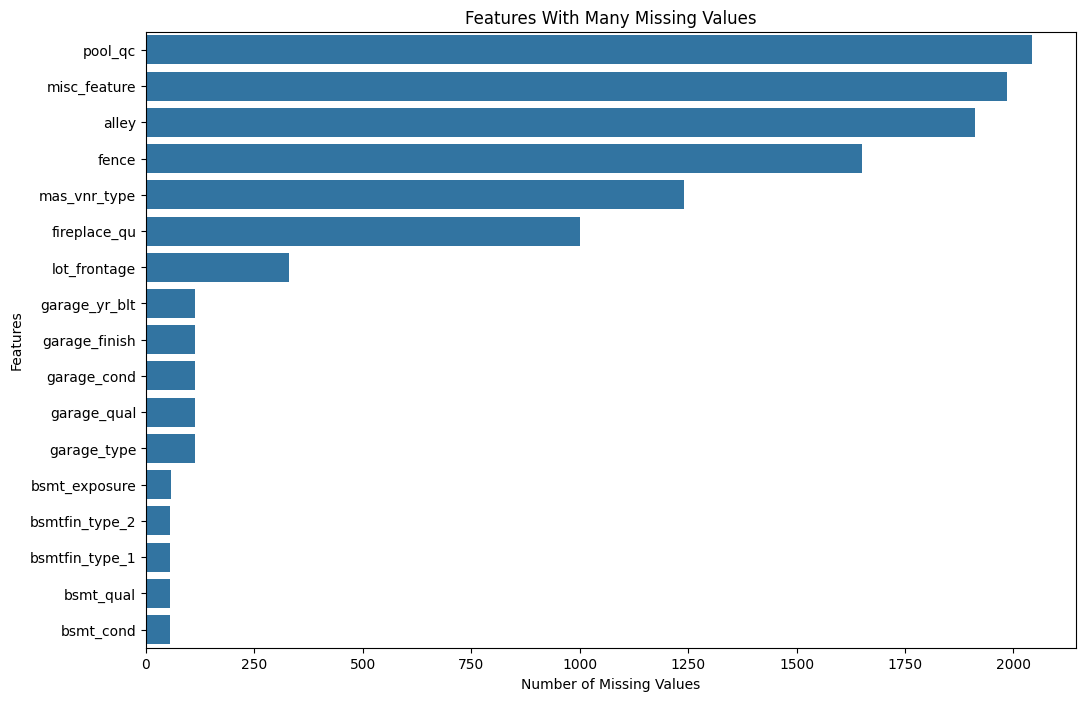

In [7]:
# Count missing values
missing_values = ames_df.isna().sum()
missing_values = missing_values[missing_values > 50].sort_values(ascending=False)
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.barplot(y=missing_values.index, x=missing_values.values)  # Swap x and y

plt.xlabel("Number of Missing Values")  # Label x-axis
plt.ylabel("Features")  # Label y-axis
plt.title("Features With Many Missing Values")  # Title
plt.show()

- Some features have few missing values.
- Many of these features with missing values appear to be interconnected, most giving information about the basement and garage.

In [8]:
# Separate numerical and categorical columns
numerical_cols = ames_df[nan_columns].select_dtypes(include=['number']).columns
categorical_cols = ames_df[nan_columns].select_dtypes(exclude=['number']).columns

In [9]:
numerical_cols

Index(['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
       'garage_yr_blt', 'garage_cars', 'garage_area'],
      dtype='object')

In [10]:
categorical_cols

Index(['alley', 'mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence',
       'misc_feature'],
      dtype='object')

In [11]:
for col in categorical_cols:
    print(f'Number of entries and number of NaN for {col}:\n')
    print(f'There are {ames_df[col].isna().sum()} missing values in the data set. This represents {ames_df[col].isna().sum()/ames_df.shape[0]:.2%} of the total rows.')
    print('-' * 50)  # Draws -----

Number of entries and number of NaN for alley:

There are 1911 missing values in the data set. This represents 93.17% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for mas_vnr_type:

There are 1240 missing values in the data set. This represents 60.46% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmt_qual:

There are 55 missing values in the data set. This represents 2.68% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmt_cond:

There are 55 missing values in the data set. This represents 2.68% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmt_exposure:

There are 58 missing values in the data set. This represents 2.83% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmtfi

In [12]:
for col in numerical_cols:
    print(f'Number of entries and number of NaN for {col}:\n')
    print(f'There are {ames_df[col].isna().sum()} missing values in the data set. This represents {ames_df[col].isna().sum()/ames_df.shape[0]:.2%} of the total rows.')
    print('-' * 50)  # Draws -----

Number of entries and number of NaN for lot_frontage:

There are 330 missing values in the data set. This represents 16.09% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for mas_vnr_area:

There are 22 missing values in the data set. This represents 1.07% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmtfin_sf_1:

There are 1 missing values in the data set. This represents 0.05% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmtfin_sf_2:

There are 1 missing values in the data set. This represents 0.05% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for bsmt_unf_sf:

There are 1 missing values in the data set. This represents 0.05% of the total rows.
--------------------------------------------------
Number of entries and number of NaN for to

### 5.2 Handling Missing Values in Categorical Features

In [13]:
categorical_cols

Index(['alley', 'mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence',
       'misc_feature'],
      dtype='object')

There are three possible interpretations for these missing values: they could be errors, or they might indicate that the house lacks the corresponding feature.

- If they are errors, one approach is to impute the mode for each category.
- If they signify a missing feature, a possible solution is to assign a new category such as **'None'** or **'NA'**.

Additionally, several numerical features related to the garage and basement contain **zero values**. This suggests that the missing values likely indicate that these houses do not have these features.


In [14]:
# Replace NaN values with 'NA'
ames_df[categorical_cols] = ames_df[categorical_cols].fillna("Not Applicable").copy()

### 5.3 Handling Missing Values in Numerical Features

In [15]:
numerical_cols

Index(['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
       'garage_yr_blt', 'garage_cars', 'garage_area'],
      dtype='object')

In [16]:
ames_df['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [17]:
ames_df['garage_yr_blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

Similar to my categorical features, I can assume that NaN values represent **0**. However, exceptions to this are **`garage_yr_blt`** and **`lot_frontage`**, as imputing them with **0** could negatively impact my linear regression model.  

To improve **model stability while preserving data integrity**, I will impute **`lot_frontage`** using the **median lot frontage within the same neighborhood** to account for spatial variations. For **`garage_yr_blt`**, instead of replacing NaNs with **0** or **`built_yr`**, I will impute them using the **most common garage year within the same neighborhood**, ensuring a more data-driven approach.

In [18]:
# Replacing NaNs in lot_frontage with neighborhood median. 
# Some neighborhoods only have NaNs in lot_frontage, in these cases I will use the overall median.

ames_df['lot_frontage'] = ames_df.groupby('neighborhood')['lot_frontage'].transform(
    lambda x: x.fillna(x.median()) if not x.dropna().empty else ames_df['lot_frontage'].median()
)

In [19]:
# Verify that there are no more missing values in 'Lot Frontage'
print(f"Missing values in 'lot_frontage' (train): {ames_df['lot_frontage'].isna().sum()}")  # Should print 0

Missing values in 'lot_frontage' (train): 0


In [20]:
# Replacing NaNs in lot_frontage with neighborhood mode

ames_df['garage_yr_blt'] = ames_df.groupby('neighborhood')['garage_yr_blt'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else ames_df['garage_yr_blt'].median()))

In [21]:
# Verify that there are no more missing values in 'Garage Yr Blt'
print(f"Missing values in 'garage_yr_blt' (train): {ames_df['garage_yr_blt'].isna().sum()}")  # Should print 0

Missing values in 'garage_yr_blt' (train): 0


In [22]:
# Replace NaNs
ames_df[numerical_cols] = ames_df[numerical_cols].fillna(0)

## **6. Detecting Extreme Outliers**

I will identify highly skewed features and set them aside for later testing to evaluate whether Winsorizing outliers improves model performance.

In [23]:
numerical_cols = ames_df.select_dtypes(include=['number']).columns

In [24]:
numerical_cols

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'first_flr_sf', 'second_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', 'three_ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'sale_price'],
      dtype='object')

In [25]:
ames_df['ms_subclass'] = ames_df['ms_subclass'].astype(str)
ames_df['ms_subclass'].dtypes

dtype('O')

In [26]:
numerical_features = ames_df[numerical_cols].copy()
numerical_features = numerical_features[['lot_frontage', 'lot_area', 'mas_vnr_area', 
                                        'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
                                        'total_bsmt_sf', 'first_flr_sf', 'second_flr_sf',
                                        'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf',
                                         'open_porch_sf', 'enclosed_porch', 'three_ssn_porch', 'screen_porch', 
                                        'pool_area', 'misc_val', 'sale_price']]


In [27]:
def get_highly_skewed_features(df, skew_threshold=2.0):
    """
    Identifies numerical features with high skewness (default >2.0 for extreme outliers).
    
    Parameters:
    df (DataFrame): The dataset
    skew_threshold (float): The minimum skewness value to consider as high (default=2.0)
    
    Returns:
    list: A list of feature names with high skewness
    """
    skewness = numerical_features.apply(lambda x: x.skew()).sort_values(ascending=False)  # Compute skewness
    high_skew_features = skewness[skewness > skew_threshold].index.tolist()  # Get features exceeding threshold
    
    return high_skew_features

In [28]:
highly_skewed_features = get_highly_skewed_features(numerical_features)
print("Highly Skewed Features:", highly_skewed_features)

Highly Skewed Features: ['misc_val', 'pool_area', 'three_ssn_porch', 'low_qual_fin_sf', 'lot_area', 'bsmtfin_sf_2', 'screen_porch', 'enclosed_porch', 'mas_vnr_area', 'open_porch_sf', 'wood_deck_sf']


## **7. Saving Cleaned Data**

In [29]:
ames_df.to_csv('../data/clean_data/ames.csv', index=False)